# Bar Plot of Top Skills for Cloud Engineers (2.11.1) - Problem

Problem Statement: Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

In [26]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Datadataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [27]:
type(['job_skills'])

list

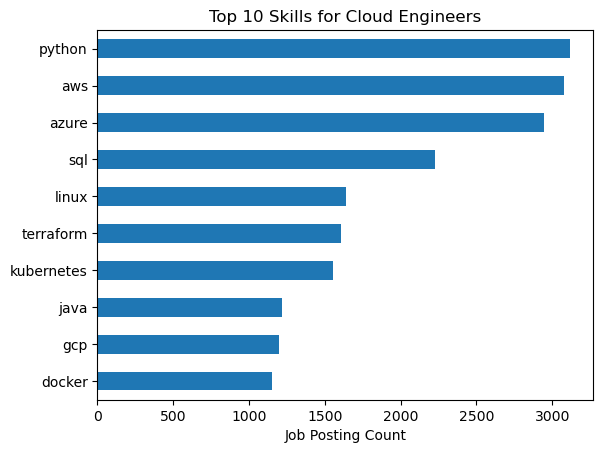

In [ ]:
#Exploding job_skills column
df_exploded = df.explode('job_skills')

#Counting all the exploded values
df_exploded['job_skills'].value_counts().head(10)

#Grouping by job_title_short and job_skills
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')

#Sorting previous values in descending mode
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

#Counting the job_title_short values for skills (top 10)
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

job_title = 'Cloud Engineer'
top_skills = 10

df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

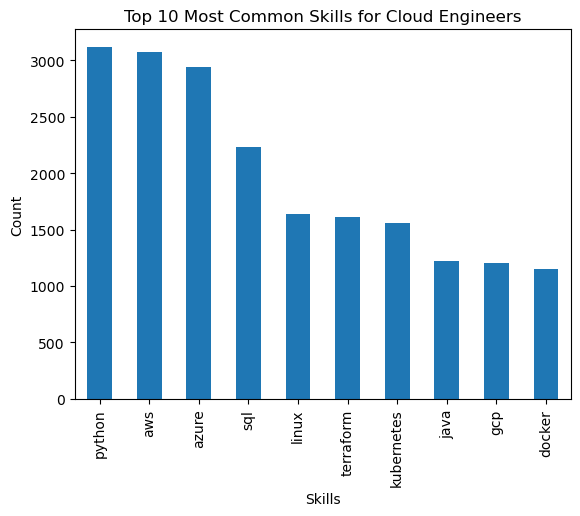

In [52]:
# Lukas's way

df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head(10)
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()